## Laboratorio 3

Ignacio Méndez Alvarez (22613) y Diego Soto Flores (22737)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from generators.polymnist_generator import PolyMNISTGenerator

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# **Modelo 1**

In [2]:
train_dir = "PolyMNIST/MMNIST/train"
test_dir = "PolyMNIST/MMNIST/test"
train_gen = PolyMNISTGenerator(train_dir, batch_size=128)
test_gen = PolyMNISTGenerator(test_dir, batch_size=128, shuffle=False)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10
)

Epoch 1/10
2344/2344 [==============================] - 420s 179ms/step - loss: 0.1424 - accuracy: 0.9544 - val_loss: 0.0705 - val_accuracy: 0.9778
Epoch 2/10
2344/2344 [==============================] - 454s 194ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0478 - val_accuracy: 0.9849
Epoch 3/10
2344/2344 [==============================] - 496s 212ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0664 - val_accuracy: 0.9816
Epoch 4/10
2344/2344 [==============================] - 533s 228ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0604 - val_accuracy: 0.9850
Epoch 5/10
2344/2344 [==============================] - 439s 187ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0465 - val_accuracy: 0.9857
Epoch 6/10
2344/2344 [==============================] - 378s 160ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0695 - val_accuracy: 0.9840
Epoch 7/10
2344/2344 [==============================] - 324s 138ms/step - loss: 0.0086 - accuracy: 0.9972 - val_

In [6]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Precisión en test: {test_acc:.4f}")

391/391 [==============================] - 30s 76ms/step - loss: 0.0670 - accuracy: 0.9877
Precisión en test: 0.9877


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

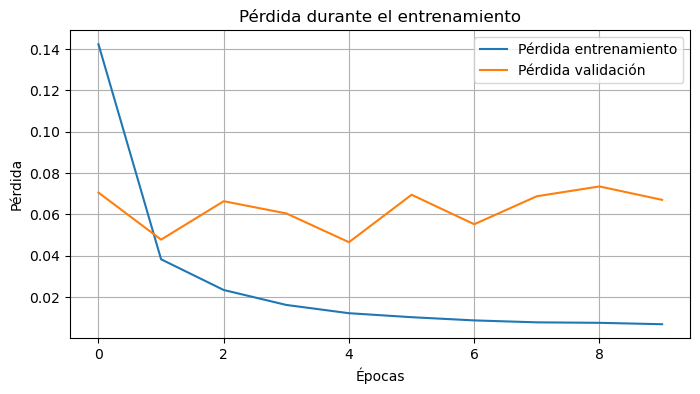

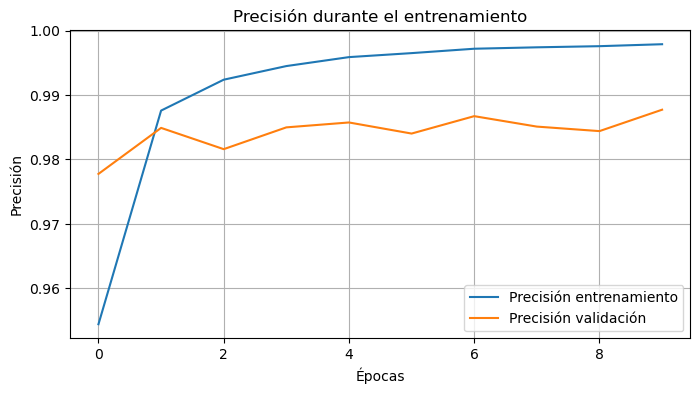

In [8]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Graficar precisión
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
model.save("modelo_cnn_polymnist.h5")
print("Modelo guardado como modelo_cnn_polymnist.h5")

Modelo guardado como modelo_cnn_polymnist.h5


c:\Users\dfsf2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 10ms/step


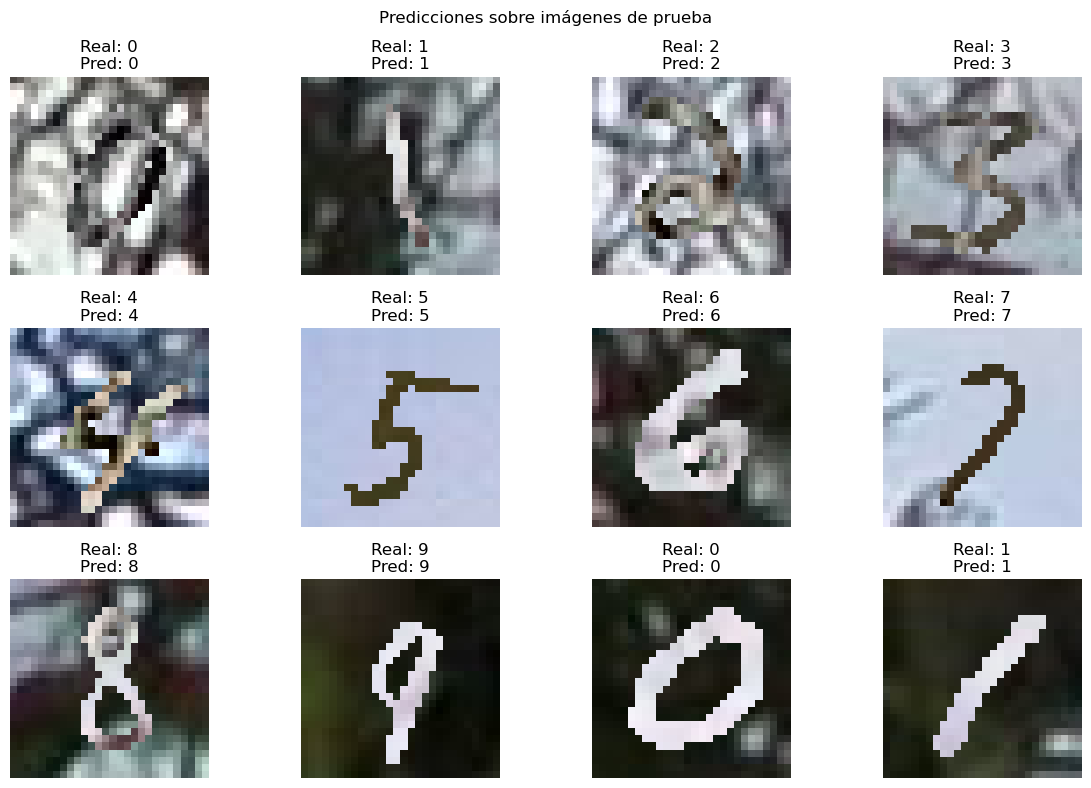

In [11]:
class_names = [str(i) for i in range(10)]
X_test, y_test = test_gen[0]  # tomar el primer batch
preds = model.predict(X_test)
preds_labels = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Real: {class_names[y_true[i]]}\nPred: {class_names[preds_labels[i]]}")

plt.suptitle("Predicciones sobre imágenes de prueba")
plt.tight_layout()
plt.show()

In [15]:
y_true_all = []
y_pred_all = []
for i in range(len(test_gen)):
    X_batch, y_batch = test_gen[i]
    pred_batch = model.predict(X_batch)
    y_true_all.extend(np.argmax(y_batch, axis=1))
    y_pred_all.extend(np.argmax(pred_batch, axis=1))

3/3 [==============================] - 0s 9ms/step



Reporte de clasificación completo:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4900
           1       0.99      0.99      0.99      5675
           2       0.99      0.99      0.99      5160
           3       0.99      0.99      0.99      5050
           4       0.98      0.99      0.99      4910
           5       0.98      0.99      0.98      4460
           6       0.99      0.99      0.99      4790
           7       0.99      0.99      0.99      5140
           8       0.99      0.98      0.99      4870
           9       0.99      0.96      0.98      5045

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



<Figure size 800x600 with 0 Axes>

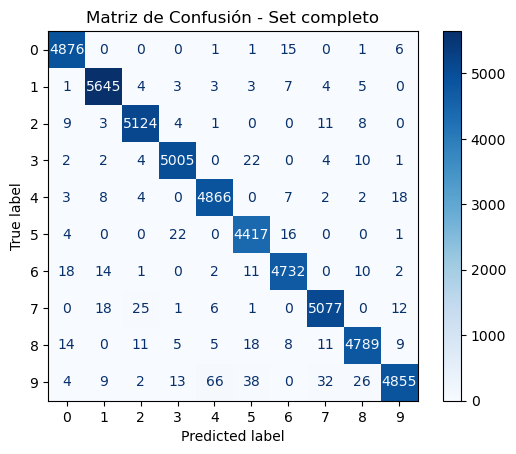

In [16]:
# Reporte de clasificación completo
print("\nReporte de clasificación completo:")
print(classification_report(y_true_all, y_pred_all, target_names=class_names))

# Matriz de confusión global
cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
plt.title("Matriz de Confusión - Set completo")
plt.grid(False)
plt.show()


# **Modelo 2**

In [19]:
train_gen = PolyMNISTGenerator("PolyMNIST/MMNIST/train", batch_size=128)
test_gen = PolyMNISTGenerator("PolyMNIST/MMNIST/test", batch_size=128, shuffle=False)


In [20]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))

In [21]:
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
history2 = model2.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10
)

Epoch 1/10
2344/2344 [==============================] - 507s 216ms/step - loss: 0.1865 - accuracy: 0.9408 - val_loss: 0.0976 - val_accuracy: 0.9679
Epoch 2/10
2344/2344 [==============================] - 519s 221ms/step - loss: 0.0674 - accuracy: 0.9783 - val_loss: 0.0485 - val_accuracy: 0.9844
Epoch 3/10
2344/2344 [==============================] - 506s 216ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0326 - val_accuracy: 0.9896
Epoch 4/10
2344/2344 [==============================] - 508s 217ms/step - loss: 0.0385 - accuracy: 0.9871 - val_loss: 0.0519 - val_accuracy: 0.9862
Epoch 5/10
2344/2344 [==============================] - 479s 204ms/step - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0379 - val_accuracy: 0.9886
Epoch 6/10
2344/2344 [==============================] - 445s 190ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0264 - val_accuracy: 0.9917
Epoch 7/10
2344/2344 [==============================] - 432s 184ms/step - loss: 0.0239 - accuracy: 0.9920 - val_

In [23]:
test_loss2, test_acc2 = model2.evaluate(test_gen)
print(f"Precisión en test (modelo mejorado): {test_acc2:.4f}")

391/391 [==============================] - 28s 72ms/step - loss: 0.0331 - accuracy: 0.9902
Precisión en test (modelo mejorado): 0.9902


In [24]:
model2.save("modelo_cnn_mejorado.h5")
print("Modelo guardado como modelo_cnn_mejorado.h5")

Modelo guardado como modelo_cnn_mejorado.h5


c:\Users\dfsf2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


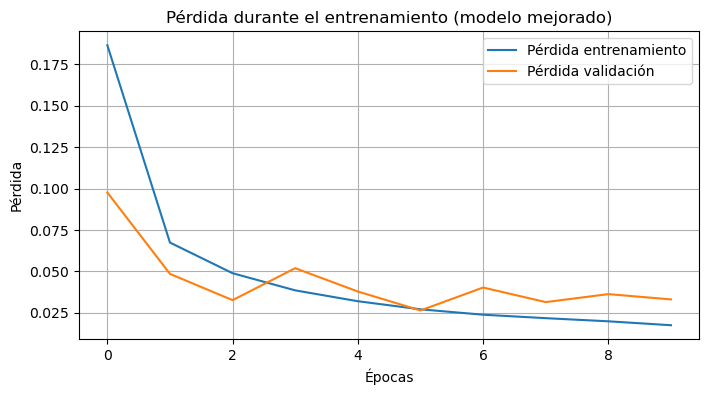

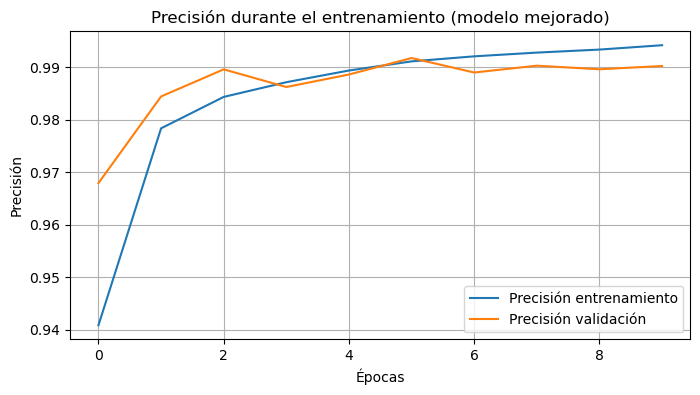

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(history2.history['loss'], label='Pérdida entrenamiento')
plt.plot(history2.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento (modelo mejorado)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history2.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history2.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento (modelo mejorado)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 13ms/step


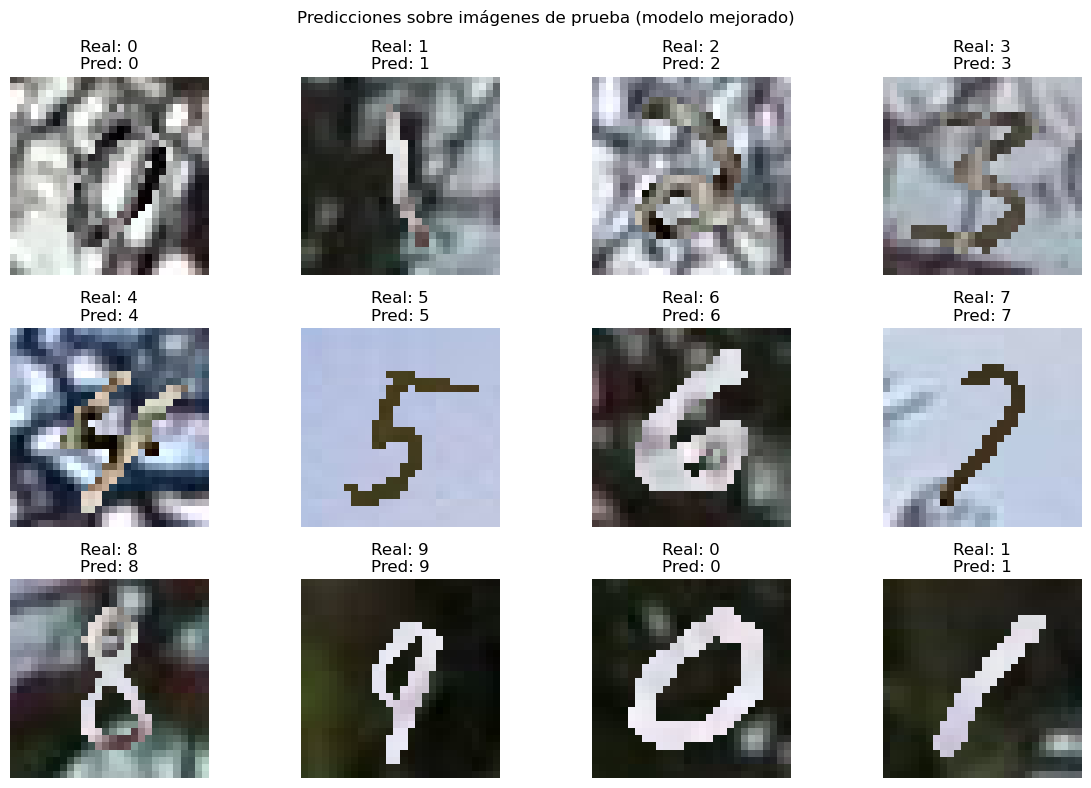

In [28]:
class_names = [str(i) for i in range(10)]
X_test, y_test = test_gen[0]
preds = model2.predict(X_test)
preds_labels = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Real: {class_names[y_true[i]]}\nPred: {class_names[preds_labels[i]]}")

plt.suptitle("Predicciones sobre imágenes de prueba (modelo mejorado)")
plt.tight_layout()
plt.show()

In [26]:
class_names = [str(i) for i in range(10)]
y_true_all = []
y_pred_all = []
for i in range(len(test_gen)):
    X_batch, y_batch = test_gen[i]
    pred_batch = model2.predict(X_batch)
    y_true_all.extend(np.argmax(y_batch, axis=1))
    y_pred_all.extend(np.argmax(pred_batch, axis=1))

3/3 [==============================] - 0s 12ms/step



Reporte de clasificación - Modelo Mejorado
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4900
           1       1.00      1.00      1.00      5675
           2       0.99      0.99      0.99      5160
           3       0.99      0.99      0.99      5050
           4       0.99      0.98      0.99      4910
           5       0.99      0.99      0.99      4460
           6       0.99      0.99      0.99      4790
           7       0.99      0.98      0.99      5140
           8       0.98      0.99      0.99      4870
           9       0.98      0.99      0.98      5045

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



<Figure size 800x600 with 0 Axes>

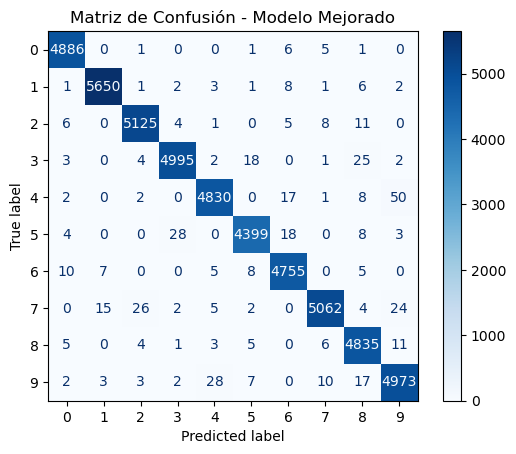

In [27]:
print("\nReporte de clasificación - Modelo Mejorado")
print(classification_report(y_true_all, y_pred_all, target_names=class_names))

cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
plt.title("Matriz de Confusión - Modelo Mejorado")
plt.grid(False)
plt.show()

Luego de realizar los dos modelos de CNN, podemos concluir que, aunque ambos modelos son muy buenos, el segundo (que es la versión mejorada) es el mejor de los dos, con un accuracy de 0.9902. El modelo 1, tiene un accuracy de 0.9877, el cual también es muy alto. 

## **Modelo 3**

In [5]:
train_gen = PolyMNISTGenerator("PolyMNIST/MMNIST/train", batch_size=128)
test_gen = PolyMNISTGenerator("PolyMNIST/MMNIST/test", batch_size=128, shuffle=False)

In [6]:
X_sample, _ = train_gen[0]
input_dim = np.prod(X_sample.shape[1:])  # 28x28x3 = 2352

In [7]:
mlp_model = models.Sequential()
mlp_model.add(layers.Flatten(input_shape=(28, 28, 3)))
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dropout(0.3))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dropout(0.3))
mlp_model.add(layers.Dense(10, activation='softmax'))

mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [8]:
history3 = mlp_model.fit(train_gen, validation_data=test_gen, epochs=10)


Epoch 1/10
2344/2344 [==============================] - 278s 118ms/step - loss: 1.3684 - accuracy: 0.5254 - val_loss: 0.9564 - val_accuracy: 0.6892
Epoch 2/10
2344/2344 [==============================] - 181s 76ms/step - loss: 1.0379 - accuracy: 0.6498 - val_loss: 0.7886 - val_accuracy: 0.7511
Epoch 3/10
2344/2344 [==============================] - 192s 82ms/step - loss: 0.9190 - accuracy: 0.6943 - val_loss: 0.6921 - val_accuracy: 0.7863
Epoch 4/10
2344/2344 [==============================] - 138s 59ms/step - loss: 0.8490 - accuracy: 0.7208 - val_loss: 0.6462 - val_accuracy: 0.8058
Epoch 5/10
2344/2344 [==============================] - 149s 64ms/step - loss: 0.7945 - accuracy: 0.7390 - val_loss: 0.6101 - val_accuracy: 0.8156
Epoch 6/10
2344/2344 [==============================] - 264s 113ms/step - loss: 0.7626 - accuracy: 0.7507 - val_loss: 0.5925 - val_accuracy: 0.8210
Epoch 7/10
2344/2344 [==============================] - 132s 57ms/step - loss: 0.7341 - accuracy: 0.7612 - val_loss:

In [9]:
test_loss3, test_acc3 = mlp_model.evaluate(test_gen)
print(f"Precisión en test (MLP): {test_acc3:.4f}")

391/391 [==============================] - 19s 48ms/step - loss: 0.5288 - accuracy: 0.8396
Precisión en test (MLP): 0.8396


In [10]:
mlp_model.save("modelo_mlp_polymnist.h5")
print("Modelo guardado como modelo_mlp_polymnist.h5")

Modelo guardado como modelo_mlp_polymnist.h5


c:\Users\dfsf2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


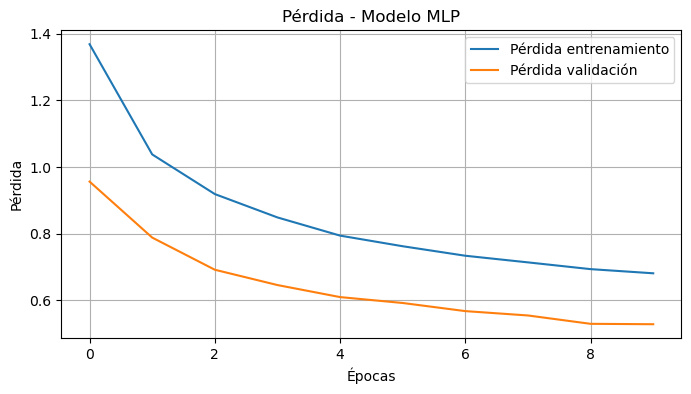

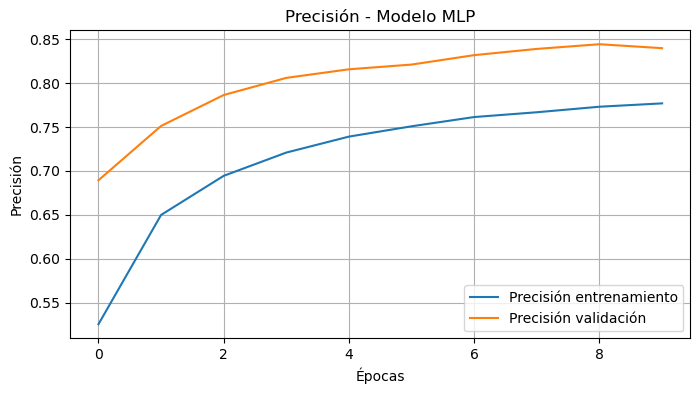

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(history3.history['loss'], label='Pérdida entrenamiento')
plt.plot(history3.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida - Modelo MLP')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history3.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history3.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión - Modelo MLP')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 2ms/step


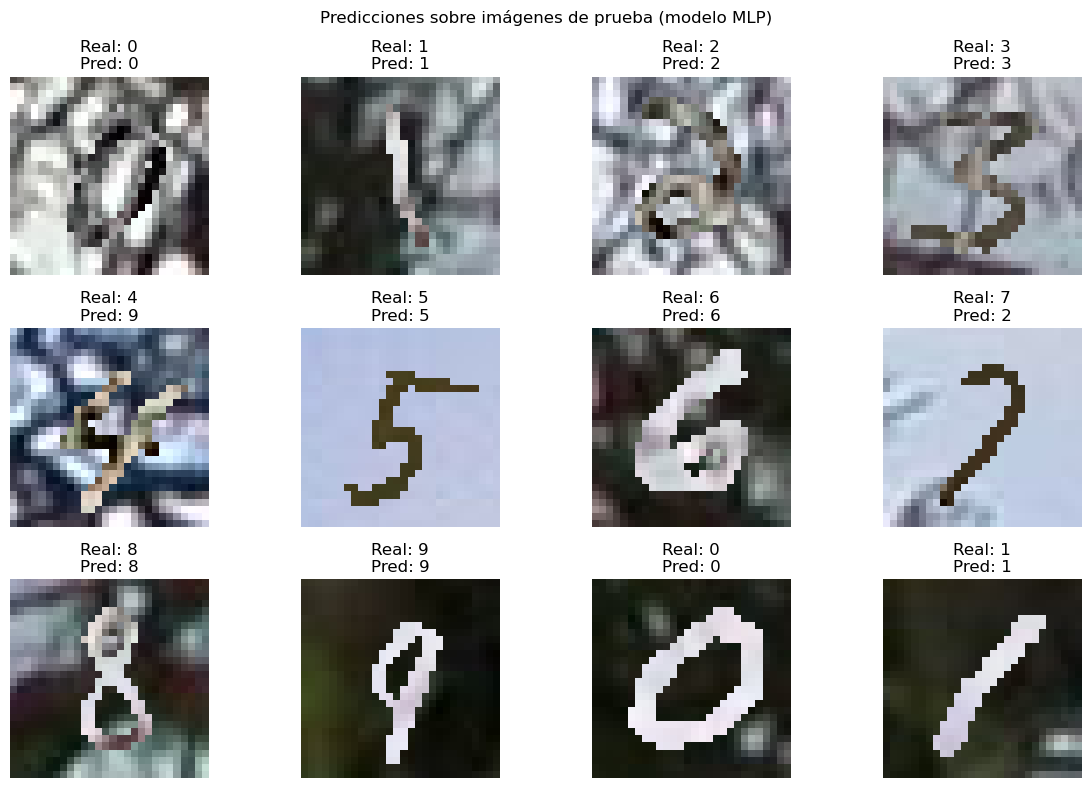

In [13]:
class_names = [str(i) for i in range(10)]
X_test, y_test = test_gen[0]
preds = mlp_model.predict(X_test)
preds_labels = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Real: {class_names[y_true[i]]}\nPred: {class_names[preds_labels[i]]}")

plt.suptitle("Predicciones sobre imágenes de prueba (modelo MLP)")
plt.tight_layout()
plt.show()

3/3 [==============================] - 0s 2ms/step

Reporte de clasificación - Modelo MLP
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4900
           1       0.91      0.90      0.91      5675
           2       0.80      0.85      0.83      5160
           3       0.79      0.85      0.82      5050
           4       0.82      0.86      0.84      4910
           5       0.83      0.76      0.79      4460
           6       0.87      0.86      0.86      4790
           7       0.83      0.86      0.84      5140
           8       0.86      0.74      0.80      4870
           9       0.79      0.82      0.80      5045

    accuracy                           0.84     50000
   macro avg       0.84      0.84      0.84     50000
weighted avg       0.84      0.84      0.84     50000



<Figure size 800x600 with 0 Axes>

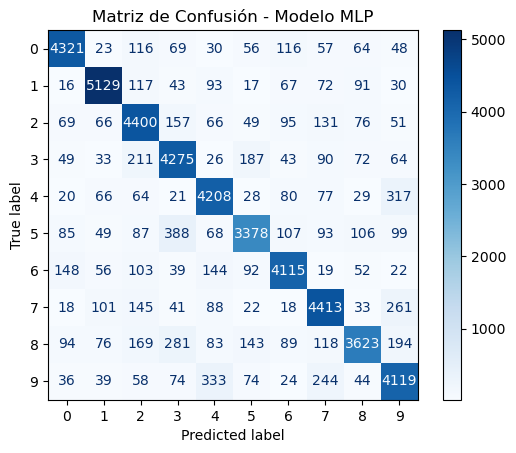

In [12]:
class_names = [str(i) for i in range(10)]
y_true_all = []
y_pred_all = []
for i in range(len(test_gen)):
    X_batch, y_batch = test_gen[i]
    pred_batch = mlp_model.predict(X_batch)
    y_true_all.extend(np.argmax(y_batch, axis=1))
    y_pred_all.extend(np.argmax(pred_batch, axis=1))

print("\nReporte de clasificación - Modelo MLP")
print(classification_report(y_true_all, y_pred_all, target_names=class_names))

cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
plt.title("Matriz de Confusión - Modelo MLP")
plt.grid(False)
plt.show()


## **Modelo 4**

In [15]:
train_gen = PolyMNISTGenerator("PolyMNIST/MMNIST/train", batch_size=128)
test_gen = PolyMNISTGenerator("PolyMNIST/MMNIST/test", batch_size=128, shuffle=False)

In [16]:
red_simple = models.Sequential()
red_simple.add(layers.Flatten(input_shape=(28, 28, 3)))
red_simple.add(layers.Dense(128, activation='relu'))
red_simple.add(layers.Dense(10, activation='softmax'))

red_simple.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [17]:
history4 = red_simple.fit(train_gen, validation_data=test_gen, epochs=10)

Epoch 1/10
2344/2344 [==============================] - 159s 68ms/step - loss: 1.2877 - accuracy: 0.5571 - val_loss: 1.0393 - val_accuracy: 0.6497
Epoch 2/10
2344/2344 [==============================] - 126s 54ms/step - loss: 0.9293 - accuracy: 0.6983 - val_loss: 0.8478 - val_accuracy: 0.7295
Epoch 3/10
2344/2344 [==============================] - 168s 71ms/step - loss: 0.8038 - accuracy: 0.7420 - val_loss: 0.7322 - val_accuracy: 0.7695
Epoch 4/10
2344/2344 [==============================] - 148s 63ms/step - loss: 0.7413 - accuracy: 0.7632 - val_loss: 0.7180 - val_accuracy: 0.7742
Epoch 5/10
2344/2344 [==============================] - 179s 76ms/step - loss: 0.7088 - accuracy: 0.7739 - val_loss: 0.7082 - val_accuracy: 0.7751
Epoch 6/10
2344/2344 [==============================] - 179s 76ms/step - loss: 0.6874 - accuracy: 0.7815 - val_loss: 0.6834 - val_accuracy: 0.7837
Epoch 7/10
2344/2344 [==============================] - 110s 47ms/step - loss: 0.6698 - accuracy: 0.7861 - val_loss: 0

In [18]:
test_loss4, test_acc4 = red_simple.evaluate(test_gen)
print(f"Precisión en test (Red simple): {test_acc4:.4f}")


391/391 [==============================] - 16s 42ms/step - loss: 0.6483 - accuracy: 0.7949
Precisión en test (Red simple): 0.7949


In [19]:
red_simple.save("modelo_red_simple.h5")
print("Modelo guardado como modelo_red_simple.h5")

Modelo guardado como modelo_red_simple.h5


c:\Users\dfsf2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


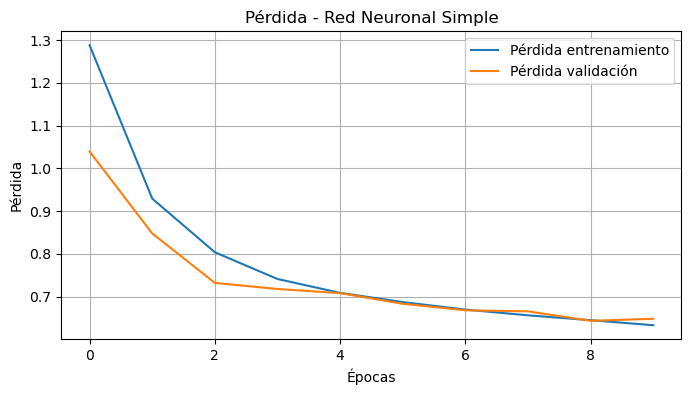

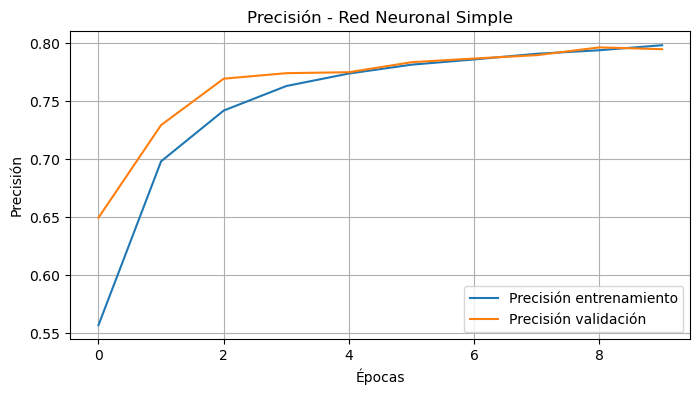

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(history4.history['loss'], label='Pérdida entrenamiento')
plt.plot(history4.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida - Red Neuronal Simple')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history4.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history4.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión - Red Neuronal Simple')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 1ms/step


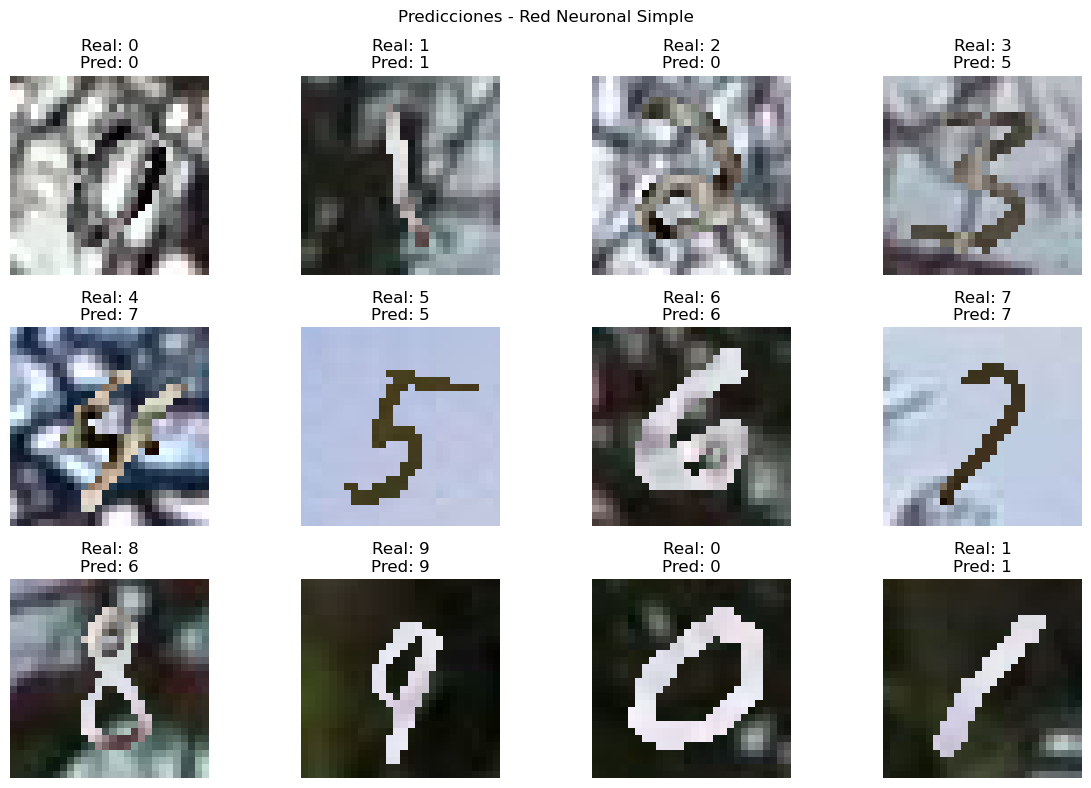

In [21]:
class_names = [str(i) for i in range(10)]
X_test, y_test = test_gen[0]
preds = red_simple.predict(X_test)
preds_labels = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Real: {class_names[y_true[i]]}\nPred: {class_names[preds_labels[i]]}")

plt.suptitle("Predicciones - Red Neuronal Simple")
plt.tight_layout()
plt.show()

3/3 [==============================] - 0s 2ms/step

Reporte de clasificación - Red Neuronal Simple
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4900
           1       0.89      0.88      0.89      5675
           2       0.77      0.78      0.78      5160
           3       0.73      0.81      0.77      5050
           4       0.72      0.85      0.78      4910
           5       0.72      0.78      0.75      4460
           6       0.86      0.84      0.85      4790
           7       0.79      0.82      0.80      5140
           8       0.78      0.69      0.73      4870
           9       0.79      0.69      0.74      5045

    accuracy                           0.79     50000
   macro avg       0.80      0.79      0.79     50000
weighted avg       0.80      0.79      0.79     50000



<Figure size 800x600 with 0 Axes>

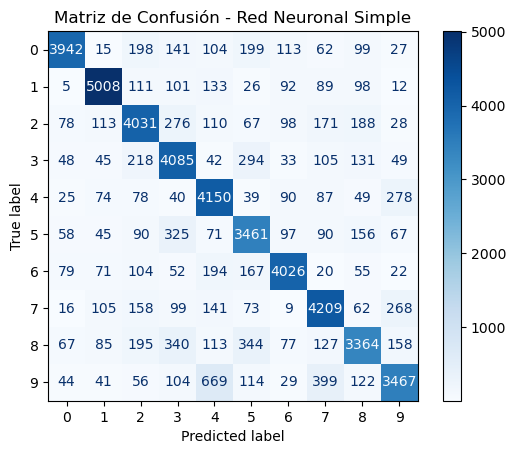

In [22]:
y_true_all = []
y_pred_all = []
for i in range(len(test_gen)):
    X_batch, y_batch = test_gen[i]
    pred_batch = red_simple.predict(X_batch)
    y_true_all.extend(np.argmax(y_batch, axis=1))
    y_pred_all.extend(np.argmax(pred_batch, axis=1))

print("\nReporte de clasificación - Red Neuronal Simple")
print(classification_report(y_true_all, y_pred_all, target_names=class_names))

cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
plt.title("Matriz de Confusión - Red Neuronal Simple")
plt.grid(False)
plt.show()

#### Comparación de modelos

Analizando los resultados de los 4 modelos realizados, podemos observar que:
- Modelo 1 (CNN): loss de 0.0670, accuracy de 0.9877
- Modelo 2 (CNN mejorado): loss de 0.0331, accuracy de 0.9902
- Modelo 3 (MLP): loss de 0.5288, accuracy de 0.8396
- Modelo 4 (Simple): loss de 0.6483, accuracy de 0.7949

Con esto, podemos ver que el mejor modelo es el CNN mejorado, cuyo accuracy llega a un 99% y tiene la menor pérdida de los 4. En segundo lugar se encuentra la versión original del modelo CNN, le sigue el modelo MLP, y por último el modelo de red simple.

### Predicción de dígitos escritos

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = load_model("modelo_cnn_mejorado.h5")

img = load_img("digito6.jpeg", target_size=(28,28)) 
x = img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0) 

pred = model.predict(x)
label = np.argmax(pred)
print("Real: 6", "Predicción:", label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
Real: 6 Predicción: 6


In [ ]:
img = load_img("digito4.jpeg", target_size=(28,28)) 
x = img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
label = np.argmax(pred)
print("Real: 4", "Predicción:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Real: 4 Predicción: 4


In [7]:
img = load_img("digito8.jpeg", target_size=(28,28)) 
x = img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
label = np.argmax(pred)
print("Real: 8", "Predicción:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Real: 8 Predicción: 8


In [9]:
img = load_img("digito2.jpeg", target_size=(28,28)) 
x = img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
label = np.argmax(pred)
print("Real: 2", "Predicción:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Real: 2 Predicción: 2


In [11]:
img = load_img("digito1.jpeg", target_size=(28,28)) 
x = img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
label = np.argmax(pred)
print("Real: 1", "Predicción:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Real: 1 Predicción: 1


In [13]:
img = load_img("digito9.jpeg", target_size=(28,28)) 
x = img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
label = np.argmax(pred)
print("Real: 9", "Predicción:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Real: 9 Predicción: 9


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
Predicción: 2


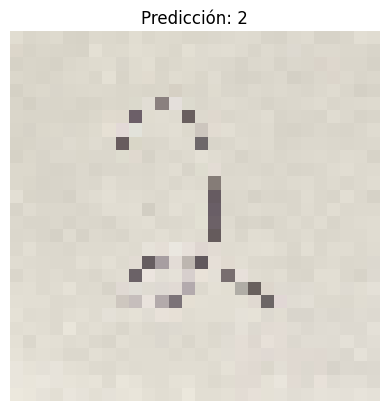

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

model = load_model("modelo_cnn_mejorado.h5")

img = load_img("digito2.jpeg", target_size=(28,28))
x = img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)  

pred = model.predict(x)
label = np.argmax(pred)
print("Predicción:", label)

plt.imshow(img)
plt.title(f"Predicción: {label}")
plt.axis('off')
plt.show()

